In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import nltk
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.preprocessing import MultiLabelBinarizer

In [13]:
with open('bgg_df.pickle', 'rb') as f:
    df = pickle.load(f)

In [3]:
df.head()

,name,desc,yr_pub,min_players,max_players,avg_play_time,min_play_time,max_play_time,min_age,categories,...,bgg_adj_rating,owned,trading,wanting,wishing,game_id,stddev,num_users_complexity,complexity,avg_sentiment_score
0,Troia,None,2005.0,2,2,60,60,60,8,"[Card Game, Math, Mythology]",...,0.0,3,0,0,0,102580,0.50000,0,0.00,0.0000
1,Mauseschlau & Bärenstark: Wissen & Lachen – Un...,None,2009.0,2,4,25,25,25,6,"[Animals, Children's Game, Movies / TV / Radio...",...,0.0,25,1,0,0,102595,1.29363,0,0.00,-0.3400
2,Quintessential: The Fifth Element,None,2011.0,2,5,45,45,45,13,[Dice],...,0.0,28,1,2,15,102597,1.74950,4,2.75,0.9983
3,Wort für Wort,None,1998.0,1,5,25,25,25,6,"[Children's Game, Educational, Word Game]",...,0.0,25,2,0,1,102598,1.36677,0,0.00,0.4939
4,Hannah Montana Secret Star,None,2009.0,2,4,15,15,15,6,"[Movies / TV / Radio theme, Racing]",...,0.0,7,0,0,1,102599,1.00000,0,0.00,0.0000


In [6]:
df.shape

(100088, 29)

In [29]:
df.columns

Index(['name', 'desc', 'yr_pub', 'min_players', 'max_players', 'avg_play_time',
       'min_play_time', 'max_play_time', 'min_age', 'categories', 'mechanics',
       'families', 'has_expansion', 'designers', 'artists', 'publishers',
       'comments', 'bgtype', 'num_users_rated', 'avg_user_rating',
       'bgg_adj_rating', 'owned', 'trading', 'wanting', 'wishing', 'game_id',
       'stddev', 'num_users_complexity', 'complexity', 'avg_sentiment_score'],
      dtype='object')

In [6]:
#drop, description isn't scraped when run in batches
df[df['desc'].isna()]

,name,desc,yr_pub,min_players,max_players,avg_play_time,min_play_time,max_play_time,min_age,categories,...,avg_user_rating,bgg_adj_rating,owned,trading,wanting,wishing,game_id,stddev,num_users_complexity,complexity
0,Troia,None,2005.0,2,2,60,60,60,8,"[Card Game, Math, Mythology]",...,5.50000,0.0,3,0,0,0,102580,0.500000,0,0.00
1,Mauseschlau & Bärenstark: Wissen & Lachen – Un...,None,2009.0,2,4,25,25,25,6,"[Animals, Children's Game, Movies / TV / Radio...",...,5.42857,0.0,25,1,0,0,102595,1.293630,0,0.00
2,Quintessential: The Fifth Element,None,2011.0,2,5,45,45,45,13,[Dice],...,7.54167,0.0,28,1,2,15,102597,1.749500,4,2.75
3,Wort für Wort,None,1998.0,1,5,25,25,25,6,"[Children's Game, Educational, Word Game]",...,5.08333,0.0,25,2,0,1,102598,1.366770,0,0.00
4,Hannah Montana Secret Star,None,2009.0,2,4,15,15,15,6,"[Movies / TV / Radio theme, Racing]",...,4.00000,0.0,7,0,0,1,102599,1.000000,0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100083,All My Ducks,None,1997.0,2,4,5,5,5,6,"[Animals, Children's Game, Memory]",...,5.00000,0.0,6,1,0,1,15346,0.816497,0,0.00
100084,Frosty The Snowman,None,1979.0,2,4,20,20,20,4,"[Children's Game, Movies / TV / Radio theme, R...",...,4.62500,0.0,8,0,0,0,15347,0.414578,0,0.00
100085,Furby Adventure Game,None,1999.0,2,6,15,15,15,4,[Children's Game],...,3.75000,0.0,10,2,0,1,15348,0.559017,2,3.00
100086,Caboose Dice,None,1974.0,2,2,30,30,30,12,[Trains],...,2.50000,0.0,4,1,1,3,15349,0.000000,0,0.00


In [ ]:
df['yr_pub'] = pd.to_datetime(df['yr_pub'],yearfirst=True).year

In [7]:
df.sort_values('yr_pub',ascending=True)

,name,desc,yr_pub,min_players,max_players,avg_play_time,min_play_time,max_play_time,min_age,categories,...,avg_user_rating,bgg_adj_rating,owned,trading,wanting,wishing,game_id,stddev,num_users_complexity,complexity
29563,Untold Battle,None,0.0,0,0,0,0,0,0,[],...,3.000,0.0,3,0,0,0,69805,0.00000,0,0.0
25926,Turncoat,None,0.0,1,2,15,15,15,10,[Abstract Strategy],...,4.000,0.0,5,0,0,0,99977,0.00000,0,0.0
69524,Einer freut sich immer,None,0.0,2,4,0,0,0,0,"[Children's Game, Racing]",...,0.000,0.0,2,0,0,0,195110,0.00000,0,0.0
69527,Ecken-Schreck!,None,0.0,2,6,0,0,0,0,"[Children's Game, Racing]",...,0.000,0.0,1,0,0,0,195115,0.00000,0,0.0
8115,Stations,None,0.0,2,6,60,45,60,14,"[Abstract Strategy, Puzzle, Transportation]",...,1.000,0.0,0,0,1,5,270228,0.00000,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25275,Rio Grande War,None,2022.0,2,2,0,0,0,0,"[American Civil War, Wargame]",...,0.000,0.0,0,0,1,1,321122,0.00000,0,0.0
76316,Nature,None,2023.0,2,5,60,30,60,10,"[Animals, Card Game, Educational, Environmenta...",...,0.000,0.0,0,0,1,7,330152,0.00000,0,0.0
95691,Dominus,None,2023.0,1,4,30,15,30,8,[Medieval],...,0.000,0.0,1,0,1,12,271081,0.00000,0,0.0
14501,Clash of the Princes,None,NaN,0,0,0,0,0,0,"[Exploration, Fantasy, Fighting]",...,6.600,0.0,52,3,2,4,54165,1.13578,3,2.0


In [8]:
df[df['yr_pub']<=1980]

,name,desc,yr_pub,min_players,max_players,avg_play_time,min_play_time,max_play_time,min_age,categories,...,avg_user_rating,bgg_adj_rating,owned,trading,wanting,wishing,game_id,stddev,num_users_complexity,complexity
5,Strat-O-Matic Baseball,None,1962.0,1,2,45,45,45,11,[Sports],...,7.77929,6.30212,1592,69,41,146,2251,1.741010,99,2.3838
7,Touring,None,1906.0,2,6,30,30,30,8,"[Card Game, Racing, Sports]",...,5.19293,5.45706,815,53,2,22,2253,1.618220,18,1.2222
8,Title Bout,None,1979.0,1,2,45,45,45,12,"[Fighting, Sports]",...,6.73842,5.66025,534,28,18,40,2254,1.791120,39,2.1795
10,The Magnificent Race,None,1975.0,2,4,60,60,60,10,"[Children's Game, Nautical, Racing, Trains, Tr...",...,6.26311,5.59584,516,33,8,42,2256,1.449970,37,1.1622
11,Weekend in Vegas,None,1974.0,2,6,180,180,180,0,"[Bluffing, Card Game, Dice, Racing]",...,5.18182,0.00000,53,13,3,1,2257,1.849730,1,1.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100060,Astrology: The Game of Prediction,None,1972.0,2,10,0,0,0,10,"[Educational, Party Game]",...,4.33333,0.00000,11,1,3,5,15321,4.027680,1,2.0000
100064,Tip the Scale,None,0.0,2,5,20,20,20,7,"[Card Game, Educational, Humor]",...,4.66667,0.00000,24,1,0,0,15326,1.247220,1,2.0000
100080,Frenzied Finance,None,1905.0,3,6,30,30,30,7,"[Card Game, Economic]",...,0.00000,0.00000,1,0,1,2,15343,0.000000,0,0.0000
100084,Frosty The Snowman,None,1979.0,2,4,20,20,20,4,"[Children's Game, Movies / TV / Radio theme, R...",...,4.62500,0.00000,8,0,0,0,15347,0.414578,0,0.0000


In [7]:
df[df['yr_pub']!=0]['yr_pub'].min()

1680.0

In [8]:
df['yr_pub'].max()

2023.0

In [6]:
df['yr_pub'].fillna(1337,inplace=True)

In [7]:
df['yr_pub'].replace(0,1337,inplace=True)

In [8]:
df[df['yr_pub'].isna()]

,name,desc,yr_pub,min_players,max_players,avg_play_time,min_play_time,max_play_time,min_age,categories,...,bgg_adj_rating,owned,trading,wanting,wishing,game_id,stddev,num_users_complexity,complexity,avg_sentiment_score


In [9]:
df[df['yr_pub']==0]

,name,desc,yr_pub,min_players,max_players,avg_play_time,min_play_time,max_play_time,min_age,categories,...,bgg_adj_rating,owned,trading,wanting,wishing,game_id,stddev,num_users_complexity,complexity,avg_sentiment_score


In [9]:
#check outliers
df['min_players'].value_counts()

2     72660
1     14046
3      8205
4      2469
0      1837
6       243
5       224
8       219
7        64
10       44
12       22
9        21
15        7
20        5
11        4
13        4
16        4
14        3
40        2
18        1
22        1
24        1
25        1
50        1
Name: min_players, dtype: int64

In [10]:
# 88758 (conv. exclusive), *26855, 26860, 92875* are obscure, keep?,  
# set a cutoff?
df[df['min_players']==0]

,name,desc,yr_pub,min_players,max_players,avg_play_time,min_play_time,max_play_time,min_age,categories,...,avg_user_rating,bgg_adj_rating,owned,trading,wanting,wishing,game_id,stddev,num_users_complexity,complexity
23,Oil Power,None,1982.0,0,0,60,60,60,8,"[Deduction, Exploration, Industry / Manufactur...",...,6.11765,0.0,50,4,9,8,2269,1.770090,2,1.5000
189,Uranium Rush,None,1955.0,0,0,0,0,0,8,"[Economic, Educational, Electronic]",...,4.50000,0.0,6,0,4,3,16053,1.658310,2,1.0000
345,Asiphile,None,2005.0,0,0,0,0,0,0,[Educational],...,0.00000,0.0,0,0,0,0,22458,0.000000,0,0.0000
477,Maktkampen: Ett manipulativt sällskapsspel,None,2014.0,0,0,0,0,0,0,"[Bluffing, Card Game, Party Game]",...,4.50000,0.0,4,1,0,0,280481,1.500000,1,1.0000
659,The Cities Game,None,1970.0,0,0,120,60,120,0,"[City Building, Economic, Political]",...,4.95000,0.0,43,5,5,15,4547,2.350000,3,2.6667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99884,Just Like Mama Used to Say,None,2019.0,0,0,0,0,0,0,"[Card Game, Humor, Party Game]",...,6.00000,0.0,3,0,0,0,309910,0.000000,1,1.0000
99906,"BLT: Baby, Lettuce, and Tomato",None,2000.0,0,0,0,0,0,18,"[Collectible Components, Fantasy, Humor]",...,5.00000,0.0,19,5,0,2,15612,0.000000,0,0.0000
99964,Missionary Conquest,None,0.0,0,0,0,0,0,8,"[Economic, Humor, Religious, Transportation]",...,4.37000,0.0,15,2,0,4,23736,2.291750,3,1.6667
99992,A History of Board-Games Other Than Chess,None,1952.0,0,0,0,0,0,0,[Book],...,8.00000,0.0,18,0,4,9,23012,0.707107,1,3.0000


In [11]:
df.iloc[99884]

name                                           Just Like Mama Used to Say
desc                                                                 None
yr_pub                                                             2019.0
min_players                                                             0
max_players                                                             0
avg_play_time                                                           0
min_play_time                                                           0
max_play_time                                                           0
min_age                                                                 0
categories                                 [Card Game, Humor, Party Game]
mechanics                                 [Hand Management, Player Judge]
families                                                               []
has_expansion                                                           0
designers                             

In [12]:
#check outliers
sorted(df['max_players'].unique())

[0,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 23,
 24,
 25,
 26,
 27,
 28,
 29,
 30,
 31,
 32,
 33,
 34,
 35,
 36,
 37,
 38,
 39,
 40,
 41,
 42,
 43,
 44,
 45,
 47,
 48,
 50,
 51,
 52,
 54,
 55,
 56,
 60,
 61,
 64,
 68,
 69,
 72,
 75,
 76,
 80,
 81,
 88,
 90,
 92,
 96,
 98,
 99,
 100,
 101,
 102,
 103,
 112,
 120,
 125,
 127,
 150,
 160,
 163,
 190,
 200,
 250,
 362,
 399,
 400,
 420,
 500,
 600,
 900,
 999,
 1000,
 2000,
 10000,
 11299]

In [13]:
#focus on avg. or min?
df['avg_play_time'].value_counts()

0        22225
30       15846
60       11182
20        9195
45        6992
         ...  
38           1
165          1
10080        1
72000        1
72           1
Name: avg_play_time, Length: 177, dtype: int64

In [14]:
df.sort_values('avg_play_time',ascending=False)

,name,desc,yr_pub,min_players,max_players,avg_play_time,min_play_time,max_play_time,min_age,categories,...,avg_user_rating,bgg_adj_rating,owned,trading,wanting,wishing,game_id,stddev,num_users_complexity,complexity
15678,Office Space: The Game,None,2020.0,2,10,30000000,30,30000000,16,"[Movies / TV / Radio theme, Party Game]",...,3.90000,0.00000,22,1,0,6,311320,0.000000,0,0.0
15524,Ars Combinatoria,None,2017.0,2,8,1576800,10,1576800,0,"[Card Game, Party Game]",...,6.16667,0.00000,32,4,1,6,234010,0.687184,0,0.0
58568,再会の約束 (Saikai no Yakusoku),None,2017.0,2,4,1576800,157680,1576800,8,"[Card Game, Educational, Party Game]",...,3.00000,0.00000,2,1,0,0,229870,0.000000,0,0.0
64806,Vietnam: 1965-1975,None,2021.0,2,2,525600,4,525600,12,"[Vietnam War, Wargame]",...,10.00000,0.00000,1,0,2,20,332402,0.000000,2,3.5
5849,"Death Ride Kursk: Sud-Front, Russland Staff Li...",None,2018.0,6,20,100000,1000,100000,16,[Wargame],...,0.00000,0.00000,1,0,0,0,331152,0.000000,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56332,Tic-Tac Bingo Game,None,0.0,2,4,0,0,0,3,"[Abstract Strategy, Children's Game, Dice, Rea...",...,4.00000,0.00000,0,0,0,0,114870,1.000000,0,0.0
56336,The Hobbit: An Unexpected Journey,None,2012.0,2,6,0,0,0,6,"[Fantasy, Movies / TV / Radio theme, Novel-based]",...,2.63181,5.43586,65,5,1,4,135801,1.581000,4,1.0
56337,Lalaloopsy: Tea Party Game,None,2012.0,2,4,0,0,0,5,[],...,7.00000,0.00000,0,0,0,0,135802,3.000000,0,0.0
56341,Don't Get Mad,None,2012.0,2,6,0,0,0,8,"[Party Game, Puzzle, Trivia]",...,5.87500,0.00000,6,3,0,0,135807,0.125000,0,0.0


In [15]:
df['min_play_time'].value_counts()

0        21015
30       17250
20       10616
60        9901
15        9189
         ...  
33           1
225          1
2400         1
10080        1
62           1
Name: min_play_time, Length: 126, dtype: int64

In [16]:
df['max_play_time'].value_counts()

0        22225
30       15846
60       11182
20        9195
45        6992
         ...  
38           1
165          1
10080        1
72000        1
72           1
Name: max_play_time, Length: 177, dtype: int64

In [17]:
#avg. = 9.420796
df['min_age'].value_counts()

0       22062
8       17480
12      15234
10      12582
6        6470
14       4485
7        4351
5        3968
4        3133
13       3011
3        1829
9        1534
18       1207
16        931
15        708
11        385
17        314
2         199
21        132
20         22
1          16
30         10
19          6
36          4
60          3
25          2
45          2
50          2
24          1
2017        1
22          1
40          1
112         1
90          1
Name: min_age, dtype: int64

In [19]:
df[df['min_age']!=0].mean()

desc                            NaN
yr_pub                  1851.255094
min_players                2.028862
max_players                6.411619
avg_play_time            473.850793
min_play_time             45.619037
max_play_time            473.850793
min_age                    9.420796
has_expansion              0.083088
num_users_rated          223.190821
avg_user_rating            4.702506
bgg_adj_rating             1.416223
owned                    377.606490
trading                   11.734230
wanting                   11.580102
wishing                   60.702497
game_id                         inf
stddev                     0.941893
num_users_complexity      13.470766
complexity                 0.903338
avg_sentiment_score        0.437044
dtype: float64

In [18]:
df[df['avg_play_time']==0]

,name,desc,yr_pub,min_players,max_players,avg_play_time,min_play_time,max_play_time,min_age,categories,...,avg_user_rating,bgg_adj_rating,owned,trading,wanting,wishing,game_id,stddev,num_users_complexity,complexity
52,Bulyah,None,2000.0,2,6,0,0,0,0,"[Humor, Party Game]",...,0.00000,0.0,0,0,0,0,23856,0.000000,0,0.0000
53,Epées Royales,None,2006.0,2,2,0,0,0,12,"[Medieval, Wargame]",...,7.22222,0.0,55,0,6,6,23857,1.157370,7,2.1429
54,Batman,None,1976.0,2,4,0,0,0,0,[Comic Book / Strip],...,4.00000,0.0,7,0,0,4,23858,2.943920,0,0.0000
55,"Murder à la carte: Eat, Drink, and Be Married",None,1997.0,6,8,0,0,0,18,"[Deduction, Murder/Mystery, Party Game]",...,0.00000,0.0,26,6,3,2,23859,0.000000,0,0.0000
57,Kort Alfapet,None,1996.0,2,4,0,0,0,0,"[Card Game, Word Game]",...,6.00000,0.0,15,0,2,4,23861,0.866025,0,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100048,Supporters,None,1990.0,2,2,0,0,0,12,[Sports],...,3.50000,0.0,17,0,0,1,15306,1.500000,0,0.0000
100052,HotFlash! The Menopause Game,None,2003.0,2,8,0,0,0,18,"[Educational, Humor]",...,1.00000,0.0,3,0,1,1,15310,0.000000,0,0.0000
100055,Duckula Card Game,None,1989.0,2,4,0,0,0,0,[Movies / TV / Radio theme],...,5.33333,0.0,4,0,1,2,15314,1.247220,0,0.0000
100060,Astrology: The Game of Prediction,None,1972.0,2,10,0,0,0,10,"[Educational, Party Game]",...,4.33333,0.0,11,1,3,5,15321,4.027680,1,2.0000


In [19]:
df[(df['owned']==0)&(df['trading']==0)&(df['wanting']==0)&(df['wishing']==0)]

,name,desc,yr_pub,min_players,max_players,avg_play_time,min_play_time,max_play_time,min_age,categories,...,avg_user_rating,bgg_adj_rating,owned,trading,wanting,wishing,game_id,stddev,num_users_complexity,complexity
52,Bulyah,None,2000.0,2,6,0,0,0,0,"[Humor, Party Game]",...,0.0,0.0,0,0,0,0,23856,0.0,0,0.0
137,Türkisch für den Urlaub,None,2006.0,2,6,45,45,45,8,"[Educational, Travel, Word Game]",...,0.0,0.0,0,0,0,0,102269,0.0,0,0.0
144,Chessnuts,None,1985.0,4,4,0,0,0,0,[Abstract Strategy],...,0.0,0.0,0,0,0,0,308951,0.0,0,0.0
145,Graffiti,None,1999.0,2,4,20,10,20,0,"[Card Game, Word Game]",...,0.0,0.0,0,0,0,0,308952,0.0,0,0.0
160,Rising Darkness,None,0.0,2,5,120,45,120,10,"[Card Game, Horror]",...,1.0,0.0,0,0,0,0,291812,0.0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
99962,Play & Learn the Childcraft Quiz Game,None,1976.0,2,6,60,60,60,0,[Trivia],...,0.0,0.0,0,0,0,0,23734,0.0,0,0.0
99966,Soul Sight CCG,None,2004.0,2,4,45,45,45,8,"[Card Game, Memory]",...,0.0,0.0,0,0,0,0,23738,0.0,0,0.0
99996,Speakeasy Street,None,0.0,20,30,0,0,0,0,"[Deduction, Mafia, Murder/Mystery, Party Game]",...,0.0,0.0,0,0,0,0,23019,0.0,0,0.0
100016,Das große Spiel um 15%,None,1979.0,2,4,0,0,0,0,[Dice],...,2.0,0.0,0,0,0,0,23044,0.0,0,0.0


In [20]:
df[df['game_id']==0]

,name,desc,yr_pub,min_players,max_players,avg_play_time,min_play_time,max_play_time,min_age,categories,...,avg_user_rating,bgg_adj_rating,owned,trading,wanting,wishing,game_id,stddev,num_users_complexity,complexity


In [21]:
df[df['complexity']>5]

,name,desc,yr_pub,min_players,max_players,avg_play_time,min_play_time,max_play_time,min_age,categories,...,avg_user_rating,bgg_adj_rating,owned,trading,wanting,wishing,game_id,stddev,num_users_complexity,complexity


In [22]:
df.iloc[100058]

name                                                              Palazzo
desc                                                                 None
yr_pub                                                             2005.0
min_players                                                             2
max_players                                                             4
avg_play_time                                                          60
min_play_time                                                          60
max_play_time                                                          60
min_age                                                                10
categories                                                  [Renaissance]
mechanics               [Auction/Bidding, Hand Management, Set Collect...
families                [Admin: Better Description Needed!, Series: Al...
has_expansion                                                           0
designers                             

In [23]:
df['complexity'].describe()

count    100088.000000
mean          0.836208
std           1.105486
min           0.000000
25%           0.000000
50%           0.000000
75%           1.666700
max           5.000000
Name: complexity, dtype: float64

In [32]:
words = set(nltk.corpus.words.words())
df['eng_comments'] = np.empty((len(df), 0)).tolist()
for idx, commlist in enumerate(df['comments']):
    eng_list = []
    for comment in commlist:
        eng_comment = " ".join(w for w in nltk.wordpunct_tokenize(comment) if w.lower() in words or not w.isalpha())
        eng_list.append(eng_comment)
    df.at[idx,'eng_comments'] = eng_list

In [36]:
df.iloc[1]['comments']

['06.02.04.01',
 '06.02.04.01 identische Neuauflage 2015 ((c)2015 + Art. Nr. Position anders)',
 'Okay with kids\nUnfortunately it uses too many stereotypes.',
 'for Kids between 6 and 13 years',
 'Kinderspiel\n']

In [37]:
df.iloc[1]['eng_comments']

['06 . 02 . 04 . 01',
 '06 . 02 . 04 . 01 2015 (( c ) 2015 + Art . . Position )',
 'with Unfortunately it too many .',
 'for between 6 and 13',
 '']

In [32]:
df['comments']

['I made the PnP from the failed Kickstarter, but haven’t tried it yet.',
 "I really like this game. I played with the designer and another guy. I regret not getting it then. I'll have to track him down again to get a copy.\n",
 "Mostly enjoyed first play. There was a loss of bidding tension in the second half, and an obvious leader once everyone's engines were built.",
 "Tentative rating after one partial play -- this seems like the sort of thing that I'm interested in, but I haven't yet gotten a really good handle on the strategy.",
 'This was great.  I wish it was available.',
 "i've been playing Shawn Storie's self-published version for years now. Quint is a really solid worker placement / engine building game. If you're afraid of dice, don't let that put you off. The dice add fun – they won't wreck your game.",
 'Played via Vassal with the designer...very much enjoyed it. Rating will probably go up as I get more plays in. Solid game.',
 'Kickstarter cancelled.',
 'The game play fi

In [72]:
##with open('bgg_df.pickle', 'wb') as bgg_df_pickle:
##    pickle.dump(df, bgg_df_pickle)

In [71]:
##df['avg_sentiment_score'] = 0.0
##for idx, row in enumerate(df['comments']):
##    analyser = SentimentIntensityAnalyzer()
##    vscore = analyser.polarity_scores(row)
##    comscore = vscore.get('compound')
##    df.at[idx,'avg_sentiment_score'] = float(comscore)

In [36]:
for idx, row in enumerate(df['comments'][:10]):
    analyser = SentimentIntensityAnalyzer()
    vscore = analyser.polarity_scores(row)
    comscore = vscore.get('compound')
    print(comscore)

0.0
-0.34
0.9983
0.4939
0.0
1.0
1.0
0.9996
1.0
0.9991


In [15]:
sent_scores = []
for idx, row in enumerate(df['comments']):
    game_sent = []
    for col in row:
        analyser = SentimentIntensityAnalyzer()
        vscore = analyser.polarity_scores(col)
        comscore = vscore.get('compound')
        game_sent.append(comscore)
    sent_scores.append(game_sent)

In [17]:
##with open('sent_scores_list.pickle', 'wb') as sent_scores_pickle:
##    pickle.dump(sent_scores, sent_scores_pickle)

In [3]:
##with open('sent_scores_list.pickle', 'rb') as f:
##    sent_scores = pickle.load(f)

In [18]:
sent_df = pd.DataFrame(sent_scores)

In [23]:
sent_df.head()

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0000,0.0000,-0.1280,0.000,0.0000,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,-0.2846,0.3384,0.2732,0.822,0.7783,0.8126,0.8341,-0.25,0.9565,0.3182,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.4939,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.0000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [20]:
sent_df.shape

(100088, 100)

In [22]:
sent_scores[:5]

[[],
 [0.0, 0.0, -0.128, 0.0, 0.0],
 [-0.2846,
  0.3384,
  0.2732,
  0.822,
  0.7783,
  0.8126,
  0.8341,
  -0.25,
  0.9565,
  0.3182,
  0.7184,
  0.4678],
 [0.4939],
 [0.0]]

In [21]:
len(sent_scores)

100088

In [10]:
avg_sent_score_list = []
for score in sent_scores:
    try:
        avg_sent_score_list.append(sum(score)/len(score))
    except:
        avg_sent_score_list.append(0)

In [4]:
avg_sent_score_list2 = []
for score in sent_scores:
    try:
        avg_sent_score_list2.append(sum(score)/len(score))
    except:
        continue

In [25]:
avg_sent_score_list[:10]

[0,
 -0.0256,
 0.48207500000000003,
 0.4939,
 0.0,
 0.42612,
 0.419377,
 0.204987,
 0.3974719999999998,
 0.4855333333333334]

In [37]:
count = 0
for item in avg_sent_score_list:
    if item == 0:
        count += 1
print(count)

43246


In [7]:
count = 0
for item in avg_sent_score_list2:
    if item == 0:
        count += 1
print(count)

11077


In [18]:
avg_sent_df = pd.DataFrame(avg_sent_score_list,columns=['avg_sent_score'])

In [19]:
avg_sent_df.head()

,avg_sent_score
0,0.000000
1,-0.025600
2,0.482075
3,0.493900
4,0.000000


In [20]:
len(avg_sent_df)

100088

In [26]:
len(avg_sent_score_list)

100088

In [64]:
df.at[0,'avg_sentiment_score'] = 1

In [37]:
df['comments'][5]

['Please can I play this game',
 'Thrifted 1990 complet copy 2.99',
 "Classic dice and charts baseball game. I played many games until I started playing the computer version which is great (and better for season replays). It's a religion as much as a game. Catholic or Protestant? APBA or Strat? I probably like APBA a bit better as a system with those magical numbers and I prefer the more standard card size. But Strat-O-Matic *feels* like baseball when you play a single game and there's much less chart referencing than either APBA or Statis Pro. ",
 '2008, 2010, HoF 75',
 "First sports sim I ever played.  Still love it.  I use super advanced rules as they bring a lot of more strategic elements to the game. Still a great game even with all the others on the market.  I don't mind the 50/50 interface.",
 'Not a big sports fan, but a friend in middle school was wildly into this for a bit.  We both purchased copies and my brother used to run whole seasons, as he was a sports statistics nut. 

In [4]:
df['avg_sentiment_score'].value_counts()

 0.0000    44128
 0.9999     4203
 1.0000     2827
 0.9998     1690
 0.9997     1044
           ...  
-0.2341        1
 0.4105        1
 0.3326        1
-0.8541        1
 0.5730        1
Name: avg_sentiment_score, Length: 7738, dtype: int64

In [70]:
df.head()

,name,desc,yr_pub,min_players,max_players,avg_play_time,min_play_time,max_play_time,min_age,categories,...,bgg_adj_rating,owned,trading,wanting,wishing,game_id,stddev,num_users_complexity,complexity,avg_sentiment_score
0,Troia,None,2005.0,2,2,60,60,60,8,"[Card Game, Math, Mythology]",...,0.0,3,0,0,0,102580,0.50000,0,0.00,0.0000
1,Mauseschlau & Bärenstark: Wissen & Lachen – Un...,None,2009.0,2,4,25,25,25,6,"[Animals, Children's Game, Movies / TV / Radio...",...,0.0,25,1,0,0,102595,1.29363,0,0.00,-0.3400
2,Quintessential: The Fifth Element,None,2011.0,2,5,45,45,45,13,[Dice],...,0.0,28,1,2,15,102597,1.74950,4,2.75,0.9983
3,Wort für Wort,None,1998.0,1,5,25,25,25,6,"[Children's Game, Educational, Word Game]",...,0.0,25,2,0,1,102598,1.36677,0,0.00,0.4939
4,Hannah Montana Secret Star,None,2009.0,2,4,15,15,15,6,"[Movies / TV / Radio theme, Racing]",...,0.0,7,0,0,1,102599,1.00000,0,0.00,0.0000


In [46]:
for comment in df['comments'][:20]:
    analyser = SentimentIntensityAnalyzer()
    vscore = analyser.polarity_scores(comment)
    sentiment = vscore.get('compound')
    print(sentiment)

0.0
-0.34
0.9983
0.4939
0.0
1.0
1.0
0.9996
1.0
0.9991
1.0
0.9758
0.9998
0.9998
0.9563
0.5994
0.9998
0.9971
0.9981
0.9998


In [34]:
score_list = []
for comment in df['comments']:
    analyser = SentimentIntensityAnalyzer()
    vscore = analyser.polarity_scores(df['comments'][2])
    sentiment = vscore.get('compound')
    score_list.append(sentiment)
print(np.mean(score_list))

0.9983000000000001


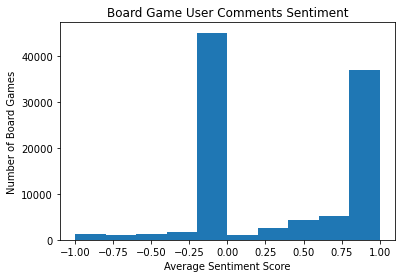

In [8]:
plt.hist(df['avg_sentiment_score'])
plt.xlabel('Average Sentiment Score')
plt.ylabel('Number of Board Games')
plt.title('Board Game User Comments Sentiment')
plt.savefig('sentiment_hist.svg');

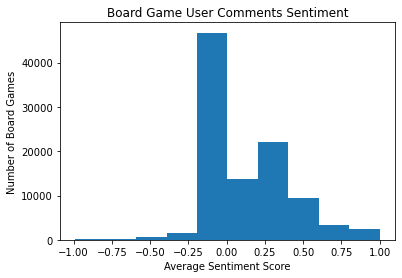

In [27]:
plt.hist(avg_sent_score_list)
plt.xlabel('Average Sentiment Score')
plt.ylabel('Number of Board Games')
plt.title('Board Game User Comments Sentiment');

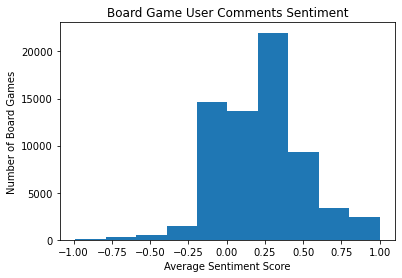

In [5]:
plt.hist(avg_sent_score_list2)
plt.xlabel('Average Sentiment Score')
plt.ylabel('Number of Board Games')
plt.title('Board Game User Comments Sentiment');

In [5]:
df['bgtype'].value_counts()

TypeError: unhashable type: 'list'

Exception ignored in: 'pandas._libs.index.IndexEngine._call_map_locations'
Traceback (most recent call last):
  File "pandas/_libs/hashtable_class_helper.pxi", line 4588, in pandas._libs.hashtable.PyObjectHashTable.map_locations
TypeError: unhashable type: 'list'


[]                                                             78391
[wargames]                                                      7432
[abstracts]                                                     4240
[childrensgames]                                                3796
[strategygames]                                                 1500
[familygames]                                                   1479
[thematic]                                                       663
[cgs]                                                            443
[partygames]                                                     426
[strategygames, familygames]                                     357
[thematic, strategygames]                                        223
[wargames, thematic]                                             150
[partygames, familygames]                                        141
[abstracts, familygames]                                         124
[thematic, familygames]           

In [10]:
#,'designers','artists','publishers'
cat_columns = ['categories','mechanics','families']
num_columns = ['yr_pub','min_players','max_players','avg_play_time','min_play_time','max_play_time','min_age','complexity']

In [49]:
cat_columns2 = ['categories','mechanics','families']
cat_mlb_list2 = []
class_list2 = []
for col in cat_columns2:
    mlb = MultiLabelBinarizer()
    df_mlb = mlb.fit_transform(df[col])
    mlbdf = pd.DataFrame(df_mlb,columns=mlb.classes_)
    cat_mlb_list2.append(mlbdf)
    class_list2.append(mlb.classes_)

In [11]:
cat_mlb_list = []
class_list = []
for col in cat_columns:
    mlb = MultiLabelBinarizer()
    df_mlb = mlb.fit_transform(df[col])
    mlbdf = pd.DataFrame(df_mlb,columns=mlb.classes_)
    cat_mlb_list.append(mlbdf)
    class_list.append(mlb.classes_)

In [9]:
class_list

[array(['Abstract Strategy', 'Action / Dexterity', 'Adventure',
        'Age of Reason', 'American Civil War', 'American Indian Wars',
        'American Revolutionary War', 'American West', 'Ancient',
        'Animals', 'Arabian', 'Aviation / Flight', 'Bluffing', 'Book',
        'Card Game', "Children's Game", 'City Building', 'Civil War',
        'Civilization', 'Collectible Components', 'Comic Book / Strip',
        'Deduction', 'Dice', 'Economic', 'Educational', 'Electronic',
        'Environmental', 'Expansion for Base-game', 'Exploration',
        'Fan Expansion', 'Fantasy', 'Farming', 'Fighting', 'Game System',
        'Horror', 'Humor', 'Industry / Manufacturing', 'Korean War',
        'Mafia', 'Math', 'Mature / Adult', 'Maze', 'Medical', 'Medieval',
        'Memory', 'Miniatures', 'Modern Warfare',
        'Movies / TV / Radio theme', 'Murder/Mystery', 'Music',
        'Mythology', 'Napoleonic', 'Nautical', 'Negotiation',
        'Novel-based', 'Number', 'Party Game', 'Pike and

In [45]:
for item in class_list:
    print(len(item))

84
182
4143
30911
21047
21672


In [37]:
from sklearn.preprocessing import StandardScaler
num_ss_list = []
for col in num_columns:
    scalar = StandardScaler()
    df_ss = scalar.fit_transform(df[col].values.reshape(-1,1))
    ssdf = pd.DataFrame(df_ss,columns=['scaled_'+str(col)])
    num_ss_list.append(ssdf)

In [20]:
num_ss_list[:6]

[          yr_pub
 0       0.325022
 1       0.331922
 2       0.335372
 3       0.312948
 4       0.331922
 ...          ...
 100083  0.311223
 100084  0.280176
 100085  0.314673
 100086  0.271551
 100087  0.292250
 
 [100088 rows x 1 columns],
         min_players
 0          0.000258
 1          0.000258
 2          0.000258
 3         -1.173922
 4          0.000258
 ...             ...
 100083     0.000258
 100084     0.000258
 100085     0.000258
 100086     0.000258
 100087     0.000258
 
 [100088 rows x 1 columns],
         max_players
 0         -0.083245
 1         -0.044188
 2         -0.024659
 3         -0.024659
 4         -0.044188
 ...             ...
 100083    -0.044188
 100084    -0.044188
 100085    -0.005131
 100086    -0.083245
 100087     0.033927
 
 [100088 rows x 1 columns],
         avg_play_time
 0           -0.003503
 1           -0.003871
 2           -0.003661
 3           -0.003871
 4           -0.003976
 ...               ...
 100083      -0.004081
 10008

In [38]:
num_df = pd.concat(num_ss_list,axis=1)

In [39]:
num_df.head()

,scaled_yr_pub,scaled_min_players,scaled_max_players,scaled_avg_play_time,scaled_min_play_time,scaled_max_play_time,scaled_min_age,scaled_complexity
0,0.335794,0.000258,-0.083245,-0.003503,0.031223,-0.003503,0.081888,-0.756420
1,0.356451,0.000258,-0.044188,-0.003871,-0.029224,-0.003871,-0.167849,-0.756420
2,0.366779,0.000258,-0.024659,-0.003661,0.005317,-0.003661,0.706231,1.731186
3,0.299646,-1.173922,-0.024659,-0.003871,-0.029224,-0.003871,-0.167849,-0.756420
4,0.356451,0.000258,-0.044188,-0.003976,-0.046495,-0.003976,-0.167849,-0.756420


In [18]:
ss = StandardScaler()
testss = ss.fit_transform(df['yr_pub'].values.reshape(-1,1))

In [19]:
testss

array([[0.32505642],
       [0.33195532],
       [0.33540477],
       ...,
       [0.31470806],
       [0.27158993],
       [0.29228664]])

In [29]:
for col in cat_columns:
    print(col)

categories
mechanics
families
designers
artists
publishers


In [29]:
cat_df = pd.concat(np.concatenate(df_list,axis=1))

NameError: name 'df_list' is not defined

In [12]:
cat_df = pd.concat(cat_mlb_list,axis=1)

In [13]:
cat_df.head()

,Abstract Strategy,Action / Dexterity,Adventure,Age of Reason,American Civil War,American Indian Wars,American Revolutionary War,American West,Ancient,Animals,...,Video Game Theme: SEGA,Video Game Theme: Sonic the Hedgehog,Video Game Theme: Super Mario Bros.,Video Game Theme: Tetris,Webcomics: Dork Tower,Webcomics: Penny Arcade,Word Games: First Letter Given,Word Games: Guess the Word,Word Games: Sign Language,Word Games: Spelling / Letters
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [25]:
for i in range(5):
    print(cat_df.iloc[:,i].sum())

8745
5497
3335
471
768


In [26]:
cat_df['Adventure'].sum()

3335

In [26]:
#details = df[['name','avg_sentiment_score','url']+num_columns]
details = df[['avg_user_rating','has_expansion']]

In [24]:
details.head()

,name,avg_sentiment_score,url,yr_pub,min_players,max_players,avg_play_time,min_play_time,max_play_time,min_age,complexity
0,Troia,0.0000,https://boardgamegeek.com/boardgame/102580,2005.0,2,2,60,60,60,8,0.00
1,Mauseschlau & Bärenstark: Wissen & Lachen – Un...,-0.3400,https://boardgamegeek.com/boardgame/102595,2009.0,2,4,25,25,25,6,0.00
2,Quintessential: The Fifth Element,0.9983,https://boardgamegeek.com/boardgame/102597,2011.0,2,5,45,45,45,13,2.75
3,Wort für Wort,0.4939,https://boardgamegeek.com/boardgame/102598,1998.0,1,5,25,25,25,6,0.00
4,Hannah Montana Secret Star,0.0000,https://boardgamegeek.com/boardgame/102599,2009.0,2,4,15,15,15,6,0.00


In [27]:
rec_df = pd.concat([rec_df,details,avg_sent_df],axis=1)

In [6]:
##with open('rec_df.pickle', 'rb') as f:
##    rec_df = pickle.load(f)

In [29]:
##with open('rec_df.pickle', 'wb') as rec_df_pickle:
##    pickle.dump(rec_df, rec_df_pickle)

In [28]:
rec_df.head()

,name,url,yr_pub,min_players,max_players,avg_play_time,min_play_time,max_play_time,min_age,complexity,...,Video Game Theme: Tetris,Webcomics: Dork Tower,Webcomics: Penny Arcade,Word Games: First Letter Given,Word Games: Guess the Word,Word Games: Sign Language,Word Games: Spelling / Letters,avg_user_rating,has_expansion,avg_sent_score
0,Troia,https://boardgamegeek.com/boardgame/102580,2005.0,2,2,60,60,60,8,0.00,...,0,0,0,0,0,0,0,5.50000,0,0.000000
1,Mauseschlau & Bärenstark: Wissen & Lachen – Un...,https://boardgamegeek.com/boardgame/102595,2009.0,2,4,25,25,25,6,0.00,...,0,0,0,0,0,0,0,5.42857,0,-0.025600
2,Quintessential: The Fifth Element,https://boardgamegeek.com/boardgame/102597,2011.0,2,5,45,45,45,13,2.75,...,0,0,0,0,0,0,0,7.54167,0,0.482075
3,Wort für Wort,https://boardgamegeek.com/boardgame/102598,1998.0,1,5,25,25,25,6,0.00,...,0,0,0,0,0,0,0,5.08333,0,0.493900
4,Hannah Montana Secret Star,https://boardgamegeek.com/boardgame/102599,2009.0,2,4,15,15,15,6,0.00,...,0,0,0,0,0,0,0,4.00000,0,0.000000


In [20]:
start = 'https://boardgamegeek.com/boardgame/'

In [21]:
df['url'] = start + df['game_id']

In [22]:
df['url'].head()

0    https://boardgamegeek.com/boardgame/102580
1    https://boardgamegeek.com/boardgame/102595
2    https://boardgamegeek.com/boardgame/102597
3    https://boardgamegeek.com/boardgame/102598
4    https://boardgamegeek.com/boardgame/102599
Name: url, dtype: object

In [15]:
def make_clickable(val):
    return '<a href="{}">{}</a>'.format(val,val)

rec_df.style.format({'url': make_clickable})

ValueError: style is not supported for non-unique indices.

In [9]:
rec_df = pd.concat([rec_df,df['url']],axis=1)

In [23]:
rec_df = rec_df.drop('avg_sentiment_score',axis=1)

In [25]:
rec_df['has_expansion'].head()

KeyError: 'has_expansion'

In [13]:
data = [dict(name='Google', url='http://www.google.com'),
        dict(name='Stackoverflow', url='http://stackoverflow.com')]
testdf = pd.DataFrame(data)

def make_clickable(val):
    # target _blank to open new window
    return '<a target="_blank" href="{}">{}</a>'.format(val, val)

testdf.style.format({'url': make_clickable})

,name,url
0,Google,http://www.google.com
1,Stackoverflow,http://stackoverflow.com


In [22]:
rec_df[rec_df['name'].str.contains('Pandemic')]

,name,avg_sentiment_score,url,yr_pub,min_players,max_players,avg_play_time,min_play_time,max_play_time,min_age,...,Video Game Theme: SEGA,Video Game Theme: Sonic the Hedgehog,Video Game Theme: Super Mario Bros.,Video Game Theme: Tetris,Webcomics: Dork Tower,Webcomics: Penny Arcade,Word Games: First Letter Given,Word Games: Guess the Word,Word Games: Sign Language,Word Games: Spelling / Letters
1690,Pandemic Legacy: Season 1,1.0000,https://boardgamegeek.com/boardgame/161936,2015.0,2,4,60,60,60,13,...,0,0,0,0,0,0,0,0,0,0
6672,Pandemic: Iberia,1.0000,https://boardgamegeek.com/boardgame/198928,2016.0,2,5,45,45,45,8,...,0,0,0,0,0,0,0,0,0,0
14379,Pandemic: Rapid Response,0.9999,https://boardgamegeek.com/boardgame/280789,2019.0,2,4,20,20,20,8,...,0,0,0,0,0,0,0,0,0,0
18117,Pandemic: Rising Tide,1.0000,https://boardgamegeek.com/boardgame/234671,2017.0,2,5,45,45,45,8,...,0,0,0,0,0,0,0,0,0,0
19298,Pandemic: The Cure,1.0000,https://boardgamegeek.com/boardgame/150658,2014.0,2,5,30,30,30,8,...,0,0,0,0,0,0,0,0,0,0
22045,American Pandemic: The Party Card Game,-0.8541,https://boardgamegeek.com/boardgame/329712,2021.0,2,10,120,30,120,13,...,0,0,0,0,0,0,0,0,0,0
24888,Pandemic: Hot Zone – Europe,0.0000,https://boardgamegeek.com/boardgame/329670,2021.0,2,4,30,30,30,8,...,0,0,0,0,0,0,0,0,0,0
27945,People Vs Pandemic,0.0000,https://boardgamegeek.com/boardgame/324628,2020.0,4,6,150,90,150,7,...,0,0,0,0,0,0,0,0,0,0
28883,Pandemic Legacy: Season 0,1.0000,https://boardgamegeek.com/boardgame/314040,2020.0,2,4,60,45,60,14,...,0,0,0,0,0,0,0,0,0,0
30567,Pandemic: Reign of Cthulhu,0.9999,https://boardgamegeek.com/boardgame/192153,2016.0,2,4,40,40,40,14,...,0,0,0,0,0,0,0,0,0,0


In [34]:
rec_df[rec_df['name']=='Pandemic: Contagion'].columns

Index(['name', 'avg_sentiment_score', 'url', 'yr_pub', 'min_players',
       'max_players', 'avg_play_time', 'min_play_time', 'max_play_time',
       'min_age',
       ...
       'Video Game Theme: SEGA', 'Video Game Theme: Sonic the Hedgehog',
       'Video Game Theme: Super Mario Bros.', 'Video Game Theme: Tetris',
       'Webcomics: Dork Tower', 'Webcomics: Penny Arcade',
       'Word Games: First Letter Given', 'Word Games: Guess the Word',
       'Word Games: Sign Language', 'Word Games: Spelling / Letters'],
      dtype='object', length=4420)

In [31]:
df[df['bgg_adj_rating']==0]

,name,desc,yr_pub,min_players,max_players,avg_play_time,min_play_time,max_play_time,min_age,categories,...,bgg_adj_rating,owned,trading,wanting,wishing,game_id,stddev,num_users_complexity,complexity,avg_sentiment_score
0,Troia,None,2005.0,2,2,60,60,60,8,"[Card Game, Math, Mythology]",...,0.0,3,0,0,0,102580,0.500000,0,0.00,0.0000
1,Mauseschlau & Bärenstark: Wissen & Lachen – Un...,None,2009.0,2,4,25,25,25,6,"[Animals, Children's Game, Movies / TV / Radio...",...,0.0,25,1,0,0,102595,1.293630,0,0.00,-0.3400
2,Quintessential: The Fifth Element,None,2011.0,2,5,45,45,45,13,[Dice],...,0.0,28,1,2,15,102597,1.749500,4,2.75,0.9983
3,Wort für Wort,None,1998.0,1,5,25,25,25,6,"[Children's Game, Educational, Word Game]",...,0.0,25,2,0,1,102598,1.366770,0,0.00,0.4939
4,Hannah Montana Secret Star,None,2009.0,2,4,15,15,15,6,"[Movies / TV / Radio theme, Racing]",...,0.0,7,0,0,1,102599,1.000000,0,0.00,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100083,All My Ducks,None,1997.0,2,4,5,5,5,6,"[Animals, Children's Game, Memory]",...,0.0,6,1,0,1,15346,0.816497,0,0.00,0.0000
100084,Frosty The Snowman,None,1979.0,2,4,20,20,20,4,"[Children's Game, Movies / TV / Radio theme, R...",...,0.0,8,0,0,0,15347,0.414578,0,0.00,0.0000
100085,Furby Adventure Game,None,1999.0,2,6,15,15,15,4,[Children's Game],...,0.0,10,2,0,1,15348,0.559017,2,3.00,0.8882
100086,Caboose Dice,None,1974.0,2,2,30,30,30,12,[Trains],...,0.0,4,1,1,3,15349,0.000000,0,0.00,-0.3054


In [35]:
df[df['avg_user_rating']==0]

,name,desc,yr_pub,min_players,max_players,avg_play_time,min_play_time,max_play_time,min_age,categories,...,bgg_adj_rating,owned,trading,wanting,wishing,game_id,stddev,num_users_complexity,complexity,avg_sentiment_score
21,Space: The Game,None,1995.0,2,4,120,120,120,10,"[Abstract Strategy, Real-time, Science Fiction...",...,0.0,2,0,3,2,2267,0.0,0,0.0,0.000
52,Bulyah,None,2000.0,2,6,0,0,0,0,"[Humor, Party Game]",...,0.0,0,0,0,0,23856,0.0,0,0.0,0.000
55,"Murder à la carte: Eat, Drink, and Be Married",None,1997.0,6,8,0,0,0,18,"[Deduction, Murder/Mystery, Party Game]",...,0.0,26,6,3,2,23859,0.0,0,0.0,0.257
56,Branson the Game,None,1992.0,2,6,30,30,30,8,"[Dice, Travel]",...,0.0,2,0,0,0,23860,0.0,0,0.0,-0.296
61,Nazca,None,2006.0,2,4,0,0,0,0,[Ancient],...,0.0,1,0,1,2,23865,0.0,0,0.0,0.000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100040,Farting Cows And The End Of The World,None,2019.0,2,4,60,30,60,12,[Humor],...,0.0,1,0,0,0,290564,0.0,0,0.0,0.000
100042,Presto! Presto!,None,2016.0,2,6,25,25,25,7,[Word Game],...,0.0,3,0,0,0,290566,0.0,0,0.0,0.000
100049,Forbidden Fruit,None,1887.0,2,6,20,20,20,0,"[Card Game, Memory]",...,0.0,1,0,0,2,15307,0.0,0,0.0,0.000
100080,Frenzied Finance,None,1905.0,3,6,30,30,30,7,"[Card Game, Economic]",...,0.0,1,0,1,2,15343,0.0,0,0.0,0.000
